# KDD: Knowledge Discovery and Data Mining:
## Steps:

-Data selection
-Data cleaning
-Data reduction and transformation
-Data mining
-Pattern evaluation and knowledge presentation

## Steps in Feature Engineering:
-Data Preparation
-Exploratory analysis (EDA)

## Feature Engineering Techniques:

1.Imputation:
`-replace values with mean/median
-Numerical data ---> Categorical
-Categorical data ---> into Numerical

2.Outlier Handling

3.Transformation: (Log, Exponential)

4.Binning: (data smoothining)

5.LabelEncoder

6.OnehotEncoder

7.Normalization: (1-10)
-Min-Max normalization
-Z-score normalization
-Scaling

## ML Model:

1.Descriptive Model
-human can understand this information very well.
-find patterns for describing the data.

2.Predictive Model
-some valuable predictions can be identified for future.

Supervised Model:
-All supervised algorithms
-Classification & Regression algorithms

Unsupervised Model:
-All supervised algorithms

Semi-supervised Model
-All supervised & unsupervised algorithms

Supervised Model:
-All supervised algorithms
-Classification & Regression algorithms

## Classification:
- task of predicting/identify the class label.
- 2/more classes can be identified
- descriptive data pattern
- multi class classification
## Regression:
-prediction of continuous features
-prediction of a features
-relation between features
-multi-variate regression

## Types of Regression:
--Simple Regression
--Multiple Regression
--Polynomial Regression
--Logistic Regression
--Lasso Regression

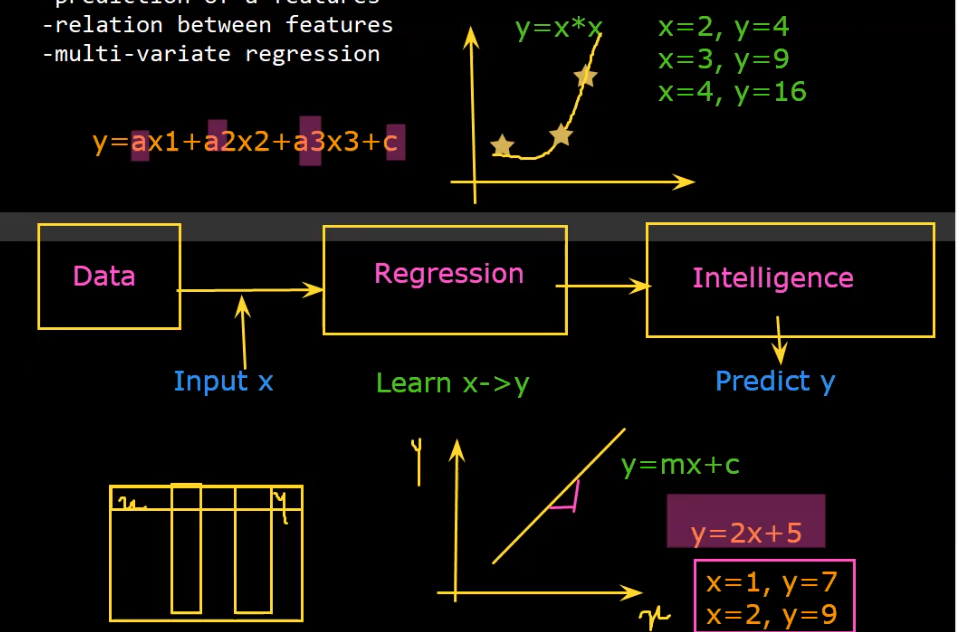

# Day 2: Data Preprocessing

In [2]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import dataset
dataset = pd.read_csv('Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [3]:
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [4]:
dataset.shape

(10, 4)

In [5]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,:3].values

In [6]:
#Independent variable
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [7]:
#Dependent variable
y

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [8]:
#Missing data
#SimpleImputer

from sklearn.impute import SimpleImputer

#assign the funtion for missing value with replacement
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')

#Fitting the imputer object
imputer.fit(X[:,1:3])

#Replacing the missing value
X[:,1:3]=imputer.transform(X[:,1:3])

In [9]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label=LabelEncoder()
X[:,0]= label.fit_transform(X[:,0])

In [11]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [14]:
onehot=OneHotEncoder()
encode=pd.DataFrame(onehot.fit_transform(dataset[['Country']]).toarray())

In [15]:
dataset1=dataset.join(encode)

,Country,Age,Salary,Purchased,0,1,2
0,France,44.0,72000.0,No,1.0,0.0,0.0
1,Spain,27.0,48000.0,Yes,0.0,0.0,1.0
2,Germany,30.0,54000.0,No,0.0,1.0,0.0
3,Spain,38.0,61000.0,No,0.0,0.0,1.0
4,Germany,40.0,NaN,Yes,0.0,1.0,0.0
5,France,35.0,58000.0,Yes,1.0,0.0,0.0
6,Spain,NaN,52000.0,No,0.0,0.0,1.0
7,France,48.0,79000.0,Yes,1.0,0.0,0.0
8,Germany,50.0,83000.0,No,0.0,1.0,0.0
9,France,37.0,67000.0,Yes,1.0,0.0,0.0


In [16]:
#Alternate
onehot=OneHotEncoder()
encode=pd.get_dummies(dataset, columns=['Country'])
encode



,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,No,1,0,0
1,27.0,48000.0,Yes,0,0,1
2,30.0,54000.0,No,0,1,0
3,38.0,61000.0,No,0,0,1
4,40.0,NaN,Yes,0,1,0
5,35.0,58000.0,Yes,1,0,0
6,NaN,52000.0,No,0,0,1
7,48.0,79000.0,Yes,1,0,0
8,50.0,83000.0,No,0,1,0
9,37.0,67000.0,Yes,1,0,0


# Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x=np.arange(0,10)
y=np.arange(11,21)

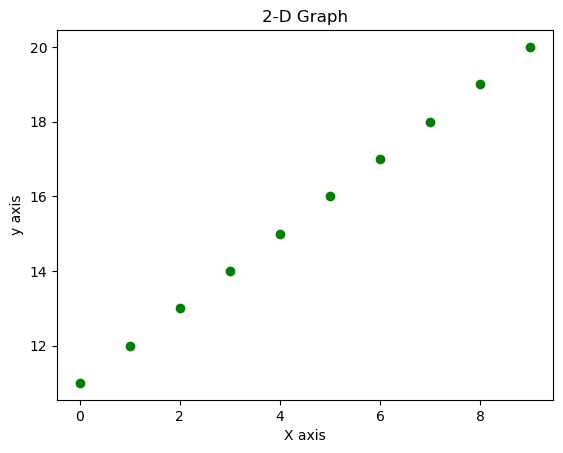

In [2]:
plt.scatter(x,y,c='g')
plt.xlabel('X axis')
plt.ylabel('y axis')
plt.title('2-D Graph')
plt.savefig('G1.png')

In [3]:
y=x*x

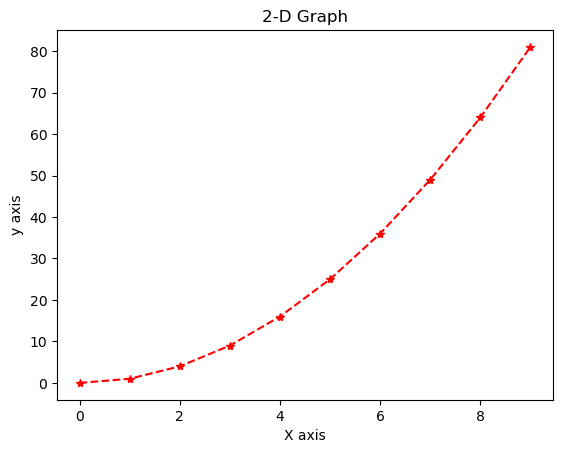

In [4]:
plt.plot(x,y,'r*',linestyle='dashed')
plt.xlabel('X axis')
plt.ylabel('y axis')
plt.title('2-D Graph')
plt.savefig('G1.png')

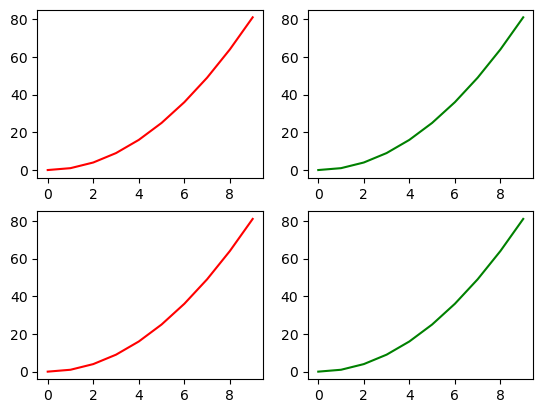

In [5]:
plt.subplot(2,2,1)
plt.plot(x,y,'r')
plt.subplot(2,2,2)
plt.plot(x,y,'g')

plt.subplot(2,2,3)
plt.plot(x,y,'r')
plt.subplot(2,2,4)
plt.plot(x,y,'g')


In [6]:
np.pi

3.141592653589793

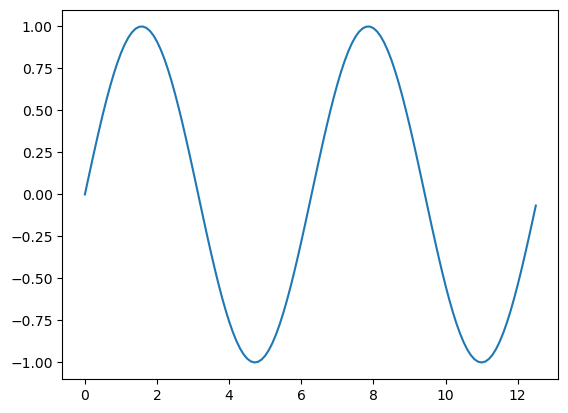

In [7]:
x=np.arange(0,4*np.pi,0.1)
y=np.sin(x)
plt.plot(x,y)
plt.show()

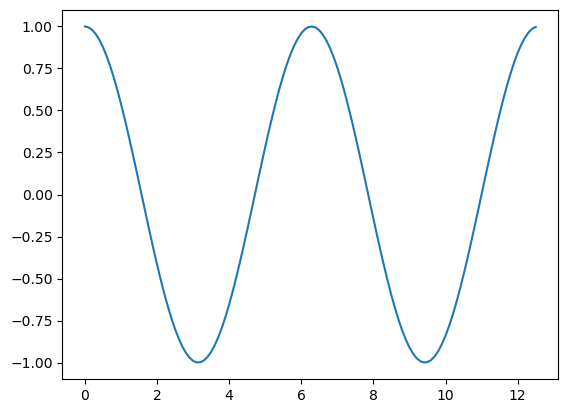

In [8]:
x=np.arange(0,4*np.pi,0.1)
y=np.cos(x)
plt.plot(x,y)
plt.show()

Text(0.5, 1.0, '2-D Graph')

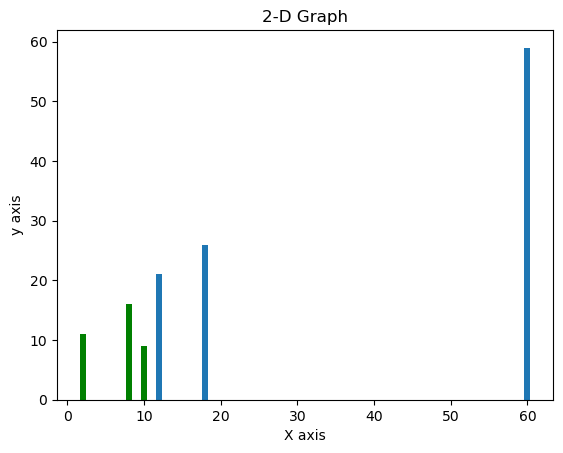

In [9]:
x=[2,8,10]
y=[11,16,9]

x1=[12,18,60]
y1=[21,26,59]

plt.bar(x,y,color='g')
plt.bar(x1,y1)
plt.xlabel('X axis')
plt.ylabel('y axis')
plt.title('2-D Graph')


(array([1., 2., 0., 4., 1., 1., 1., 1., 1., 1.]),
 array([10. , 17.9, 25.8, 33.7, 41.6, 49.5, 57.4, 65.3, 73.2, 81.1, 89. ]),
 <BarContainer object of 10 artists>)

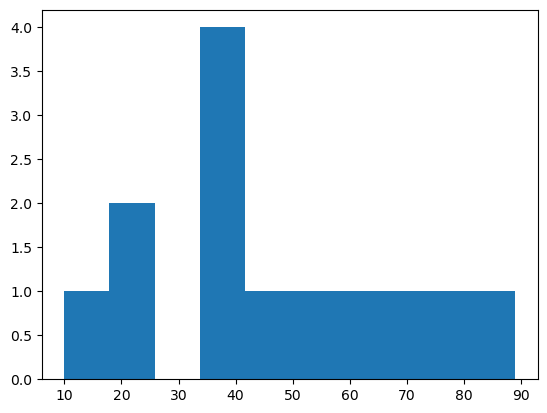

In [10]:
a=np.array([10,20,23,37,34,47,63,55,78,34,67,89,34])
plt.hist(a)

# data.csv

In [13]:
dataset= pd.read_csv('Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [14]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
encode=pd.get_dummies(dataset, columns=['Country'])
encode

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,No,1,0,0
1,27.0,48000.0,Yes,0,0,1
2,30.0,54000.0,No,0,1,0
3,38.0,61000.0,No,0,0,1
4,40.0,NaN,Yes,0,1,0
5,35.0,58000.0,Yes,1,0,0
6,NaN,52000.0,No,0,0,1
7,48.0,79000.0,Yes,1,0,0
8,50.0,83000.0,No,0,1,0
9,37.0,67000.0,Yes,1,0,0


In [15]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,3].values

In [16]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [17]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [18]:
#Splitting the dataset into the Training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)
# random_state can be any no.(1,0,41)

# HW

In [28]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt

In [29]:
dataset=pd.read_csv('iris.data.csv')

In [30]:
dataset.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [32]:
dataset.shape

(149, 5)

In [33]:
dataset.ndim

2

In [34]:
dataset.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

In [42]:
new_df= (dataset.T.reset_index().T.reset_index(drop=True).set_axis([f'Q1.{i+1}' for i in range(dataset.shape[1])], axis=1))
print(new_df)

    Q1.1 Q1.2 Q1.3 Q1.4            Q1.5
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


In [43]:
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1.1    150 non-null    object
 1   Q1.2    150 non-null    object
 2   Q1.3    150 non-null    object
 3   Q1.4    150 non-null    object
 4   Q1.5    150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB


In [44]:
new_df.columns =['Sepal_len', 'Sepal_width', 'Petal_len', 'Petal_width','Species']

In [45]:
new_df.groupby('Species')
print(new_df.groupby('Species').groups)

{'Iris-setosa': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'Iris-versicolor': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'Iris-virginica': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]}


In [46]:
new_df.groupby('Species').count()
print(new_df.groupby('Species').count())

                 Sepal_len  Sepal_width  Petal_len  Petal_width
Species                                                        
Iris-setosa             50           50         50           50
Iris-versicolor         50           50         50           50
Iris-virginica          50           50         50           50


In [47]:
new_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

TypeError: 'value' must be an instance of str or bytes, not a float

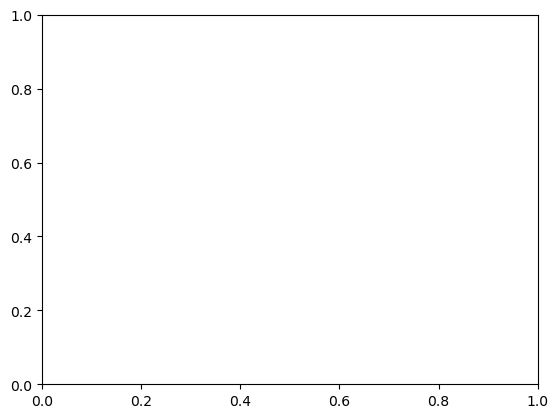

In [48]:
new_df.plot.scatter(x='Sepal_len',y='Sepal_width')